In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import scipy as sp

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('axes', axisbelow=True)
label_size = 20
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = label_size
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

lss = ['--',  ':', '-.', '-', '--', '-.', ':', '-', '--', '-.', ':', '-']
mss = ['>', 'o',  's', 'D', '>', 's', 'o', 'D', '>', 's', 'o', 'D']


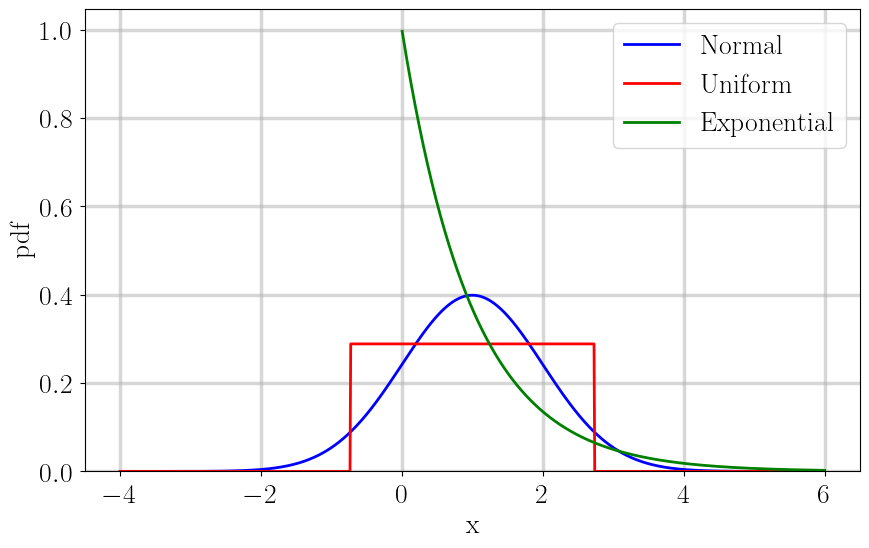

In [2]:
dist1 = sp.stats.norm(loc = 1, scale = 1)
dist2 = sp.stats.uniform(loc = -np.sqrt(3)+1, scale = 2*np.sqrt(3))
dist3 = sp.stats.expon(loc = 0, scale = 1)

x = np.linspace(-4, 6, 1000)
y1 = dist1.pdf(x)
y2 = dist2.pdf(x)
y3 = dist3.pdf(x[x > 0])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x, y1, lw=2, label='Normal', color='blue')
ax.plot(x, y2, lw=2, label='Uniform', color='red')
ax.plot(x[x > 0], y3, lw=2, label='Exponential', color='green')
ax.set_ylim(bottom=0)
ax.legend()
ax.grid(True, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf')

plt.savefig('distributions.pdf', bbox_inches='tight')
plt.show()

In [52]:
samples

array([0.75742092, 0.75742092, 0.96102827, 1.13803902, 1.48352859,
       3.08861973])

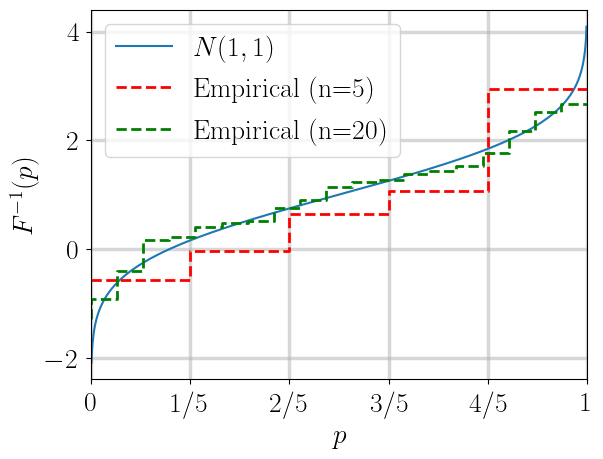

In [ ]:
# Plot quantile functions

fig = plt.figure()

# Get a ppf of an empirical distribution from dist1

samples = dist1.rvs(size=5)
samples.sort()

samples2 = dist1.rvs(size=20)
samples2.sort()

samples = np.concatenate((samples[0].reshape(1), samples), axis=0)

x = np.linspace(0, 1, 1000)
plt.grid(True, alpha=0.5)
plt.plot(x, dist1.ppf(x))
# plt.plot(x, dist2.ppf(x))
p = np.linspace(0, 1, len(samples), endpoint=True)
plt.step(p, samples, '--', linewidth=2, color='red')

p = np.linspace(0, 1, len(samples2), endpoint=True)
plt.step(p, samples2, '--', linewidth=2, color='green')

plt.xlabel('$p$')
plt.ylabel('$F^{-1}(p)$')
plt.xticks(np.arange(0, 1 + 0.2, 0.2), ['0', '1/5', '2/5', '3/5', '4/5', '1'])
plt.xlim(0,1)
plt.legend(['$N(1,1)$', 'Empirical (n=5)', 'Empirical (n=20)'], loc='upper left')
plt.savefig('quantile.pdf', bbox_inches='tight')